# Lab 1
## Part 1 Signal Generation

In [2]:
from lab_1_part_1 import *

T = 64 # Total time duration in seconds
A = 1.0 # Amplitude
a1, a2, a3 = 0.1, 0.01, 0.001 # Coefficients for the quadratic chirp

# Determine the Nyquist frequency for the quadratic chirp
Nyquist_freq = Nyquist_frequency_of_quadratic_chirp(a1, a2, a3, T)
f_max = find_pow_2(Nyquist_freq)
sampling_rate = 2 * f_max
delta_t = 1 / sampling_rate
N = int(T / delta_t)  # Number of samples

In [3]:
time_series = np.arange(0, T, delta_t)
signal = generate_quadratic_chirp(time_series, A, a1, a2, a3)

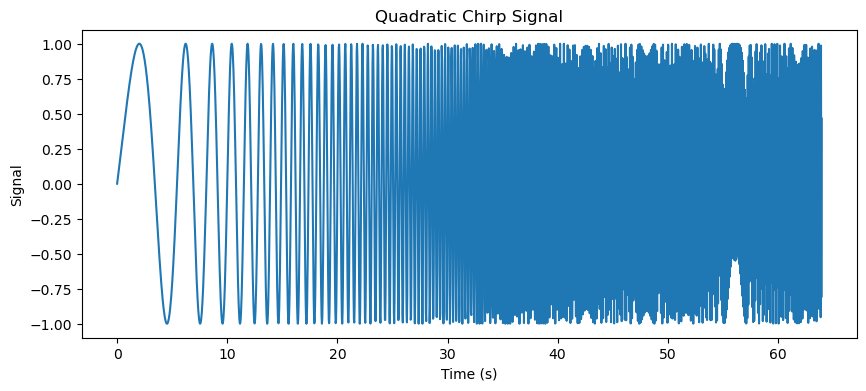

In [4]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10, 4))
plt.plot(time_series, signal)
plt.title('Quadratic Chirp Signal')
plt.xlabel('Time (s)')
plt.ylabel('Signal')
plt.show()

## Part 2 FFT

In [5]:
fd_signal = np.fft.fft(signal)
freq_series = np.fft.fftfreq(N, delta_t)

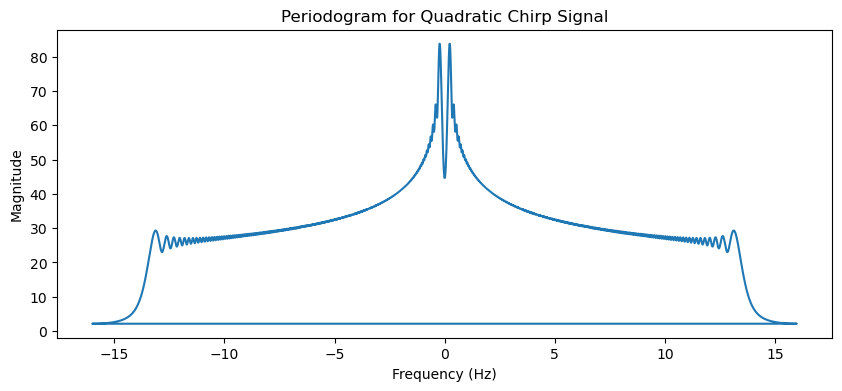

In [8]:
plt.figure(figsize=(10, 4))
plt.plot(freq_series, np.abs(fd_signal))
plt.title('Periodogram for Quadratic Chirp Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.show()

## Advanced Lab

### 1. Spectrogram

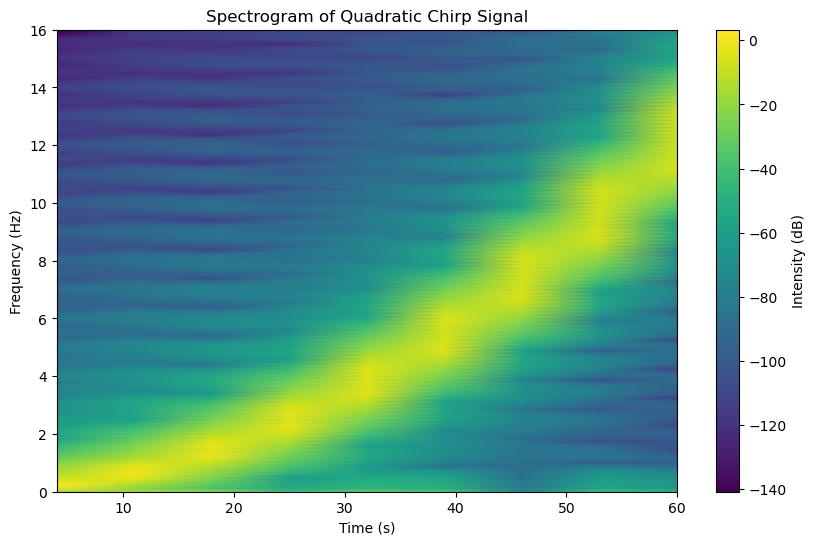

In [16]:
from scipy.signal import spectrogram

f, t, Sxx = spectrogram(signal, fs=sampling_rate, nperseg=256)
plt.figure(figsize=(10, 6))
plt.pcolormesh(t, f, 10 * np.log10(Sxx), shading='gouraud')
plt.title('Spectrogram of Quadratic Chirp Signal')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (s)')
plt.colorbar(label='Intensity (dB)')
plt.show()

### 2. Filtering

In [18]:
sin_sampling_rate = 1024  # Sampling rate for the sinusoid
sin_N = 2048  # Number of samples for the sinusoid
sin_time_series = np.arange(0, sin_N / sin_sampling_rate, 1 / sin_sampling_rate)
signal_1 = generate_sinusoidal(sin_time_series, 10, 100, 0)
signal_2 = generate_sinusoidal(sin_time_series, 5, 200, np.pi / 6)
signal_3 = generate_sinusoidal(sin_time_series, 2.5, 300, np.pi / 4)
sin_signal = signal_1 + signal_2 + signal_3

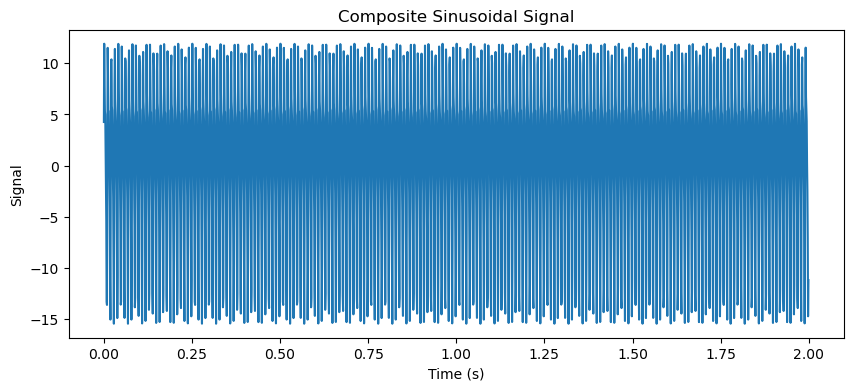

In [19]:
plt.figure(figsize=(10, 4))
plt.plot(sin_time_series, sin_signal)
plt.title('Composite Sinusoidal Signal')
plt.xlabel('Time (s)')
plt.ylabel('Signal')
plt.show()